Consider example polynomial function of different degrees as defined below:


In [17]:
import numpy as np
def polynomial(degree = 0):
    if degree == 0:
        return lambda x: np.ones_like(x)
    elif degree == 1:
        return lambda x: x
    else: # x^2 if degree = 2, x^3 if degree = 3, etc
        return lambda x: x * polynomial(degree - 1)(x)

(100,)
(100,)
(100,)
(100,)


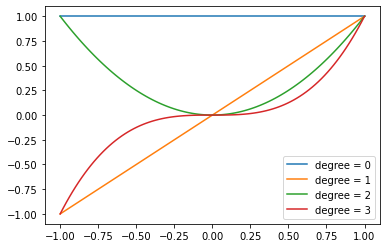

In [19]:
# plot the function
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-1, 1, 100)
for i in range(4):
    print(x.shape)
    plt.plot(x, polynomial(i)(x), label = f'degree = {i}')
plt.legend()

plt.show()

Define the analytical gradient of these polynomial functions as follows:

In [20]:
def polynomial_gradient(degree = 0):
    if degree == 0:
        return lambda x: np.zeros_like(x)
    elif degree == 1:
        return lambda x: np.ones_like(x)
    elif degree == 2:
        return lambda x: 2 * x
    else: # 2x if degree = 2, 3x^2 if degree = 3, etc
        return lambda x: degree * polynomial(degree - 1)(x)
    

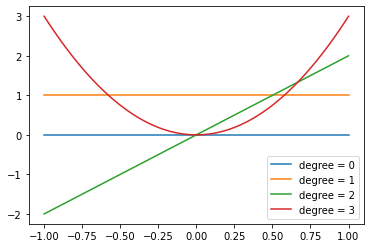

In [21]:
# plot the gradient
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-1, 1, 100)
for i in range(4):
    plt.plot(x, polynomial_gradient(i)(x), label = f'degree = {i}')
plt.legend()

plt.show()

In [36]:
#Pick a random x
x = np.random.rand()

# Compute the value of the polynomial and its gradient
values = [polynomial(i)(x) for i in range(1, 5)]
gradients = [polynomial_gradient(i)(x) for i in range(1, 5)]

In [ ]:
# Compute gradients using centered finite differences using several epsilons
epsilons = np.logspace(-9.0, -1.0, 100) # h
approximated_gradients = []
for eps in epsilons:
    approximated_gradients.append([(polynomial(i)(x + eps) - polynomial(i)(x - eps)) / (2 * eps) for i in range(1, 5)])
approximated_gradients = np.array(approximated_gradients)

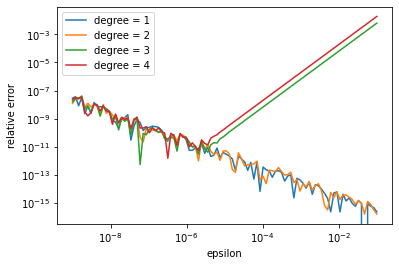

In [44]:
# Compute relative errors
relative_errors = np.abs(approximated_gradients - gradients) / np.abs(gradients)

# Plot the relative errors on a log-log plot
plt.figure()
for i in range(4):
    plt.loglog(epsilons, relative_errors[:, i], label = f'degree = {i+1}')
plt.xlabel('epsilon')
plt.ylabel('relative error')
plt.legend()

Notice how the relative error is O(h^2) after a certain value of h. Below that value, the errors due to catastrophic cancellation are dominant. The O(h^2) error is deduced from the Taylor expansion of the function around the evaluation point x. 

For functions that are quadratic and linear, the taylor expansion approach conveys that the relative errors cancel out due to the lack of higher order terms. Seemingly why, the error only seems to have the constant catastrophic cancellation error, leading to a jagged linear decrease.

However, if we take a broader look,

In [45]:
# Compute gradients using centered finite differences using several epsilons
epsilons = np.logspace(-9.0, 6.0, 100) # h
approximated_gradients = []
for eps in epsilons:
    approximated_gradients.append([(polynomial(i)(x + eps) - polynomial(i)(x - eps)) / (2 * eps) for i in range(1, 5)])
approximated_gradients = np.array(approximated_gradients)

# Compute relative errors
relative_errors = np.abs(approximated_gradients - gradients) / np.abs(gradients)

# Plot the relative errors on a log-log plot
plt.figure()
for i in range(4):
    plt.loglog(epsilons, relative_errors[:, i], label = f'degree = {i+1}')
plt.xlabel('epsilon')
plt.ylabel('relative error')
plt.legend()

For the quadratic function, the relative error is O(h) after a certain value of h. This is because, for a quadratic function, say $x^2$ here, the finite difference gradient is given by
$\frac{f(x+h) - f(x-h)}{2h} = \frac{(x+h)^2 - (x-h)^2}{2h} = \frac{x^2 - x^2 + 4xh + h^2 - h^2}{2h}$
When $h$ is small compared to $x$, the error is due to catastrophic cancellation on $\frac{x^2 - x^2}{2h}$ leading to an $O(1/h)$ error. When $h$ is large compared to $x$, the error is due to the $\frac{h^2 - h^2}{2h}$ term leading to an $O(h)$ error. 

For a higher degree polynomial, there are actual errors from the higher order terms in the taylor expansion that provide a larger $O(h^2)$ error dominating the catastrophic cancellation error, hence the straight line showing quadratic increase in the log-plot.

For our course, for linear elastic energy, we observe something like the orange (degree 2) polynomial, since the linear elastic energy is quadratic in terms of the displacement. For Neo-Hookean energy, we observe something like the green or red curve since it has higher order terms in the taylor expansion. For energies defined on external forces like gravity which is a constant force, and thus a linear energy, we observe the blue curve.

Note that the exact positioning of the minimum of the above curves on the x-axis, and the values of the errors on y-axis depends on the scaling of our objective function, thus favoring well-normalized objective functions to be numerically more stable than others. 